# Изучение рынка заведений общественного питания Москвы
- Автор: Завьялов Иван Викторович
- Дата: 05.07.2025

## Цель и задачи  

**Цель:** Провести исследовательский анализ рынка заведений общественного питания Москвы с целью выявления  оптимального расположения и характеристик для открытия нового заведения.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить категории заведений и их распределение в черте города Москвы;
    - изучить характеристики заведений и их влияние на рейтинг;
    - выделить Топ-15 сетей по количеству заведений в регионе;
    - изучить вариацию среднего чека заведения. 
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа поступили данные  о заведениях общественного питания Москвы, собранные на основе  сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- `rest_info.csv` — содержит информацию о заведениях общественного питания;
- `rest_price.csv` —  содержит информацию о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- `seats` — количество посадочных мест.

### Описание датасета `rest_price`

- `price` — категория цен в заведении;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»;


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info_df` и `rest_price_df`.

In [1]:
# Импортируем библиотеки
try:  
    import pandas as pd 
    print("Pandas установлен")   
except ImportError:  
    print("Pandas не установлен") 

# Загружаем библиотеки для визуализации данных
try:  
    import matplotlib.pyplot as plt 
    print("Matplotlib.pyplot установлен")   
except ImportError:  
    print("Matplotlib.pyplot не установлен") 

try:  
    import seaborn as sns
    print("Seaborn  установлен")    
except ImportError:  
    print("Seaborn  не установлен")     


# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
try:  
    from phik import phik_matrix
    print("Phik_matrix  установлен")    
except ImportError:  
    print("Phik_matrix  не установлен") 

Pandas установлен
Matplotlib.pyplot установлен
Seaborn  установлен
Phik_matrix  установлен


In [2]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют одинаковый и допустимый вид. Названия можно будет оставить, как в исходном датасете.
- Данные не полностью соответствуют описанию, так как присутствует не указанный в описании столбец 'id' с уникальным идентификатором заведения.
- Все представленные данные содержат как числовые, так и строковые значения и хранятся в типах данных `int64` , `float64` и `object`. Значения в столбцах `id`, `name`, `category`, `address`, `district` и `hours` представлены строковыми данными и соответствуют своему типу. Значения в столбцах `rating`, `chain` и `seats` представлены числовыми данными. Числовые столбцы `rating` и `chain` имеют ограниченный диапазон значений  — размерность этих данных можно оптимизировать. Столбец `seats` имеет целочисленные данные, но представлен в вещественном типе из-за наличия пропусков в данных.
- Пропуски содержатся только в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Название столбца `hours` можно заменить на другое,более подходящее его содержанию.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов нормализованы и представлены в едином виде snake case.
- Данные не полностью соответствуют описанию, так как присутствует не указанный в описании столбец 'id' с уникальным идентификатором заведения.
- Типы данных соответствуют содержимому.
- Пропуски есть во всех столбцах, кроме `id`, что указывает на плохое качество данных.
- Значения в столбцах соответствуют описанию.
- Столбцы `price` и `middle_coffee_cup` можно переименовать для более корректного обозначения содержащихся данных.

Первичное знакомство показывает, что данные в датасете `rest_info.csv` хорошего качества — имеют не так много пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. А данные в датасете `rest_price.csv` плохого качества — имеют  много пропущенных значений в разных столбцах,но данные соответствуют описанию и выглядят корректными.

Перед предобработкой данных объединим  два датасета в один и далее будем работать с ним. Объединение произведём методом merge(), используя столбец `id` с идентификаторами заведений и способом объединения Left, чтобы не потерять данные из первого датасета.

In [7]:
# Объединяем два датасета в один
rest_df=rest_info_df.merge(rest_price_df,on='id',how='left')

In [8]:
# Выведем первые строки общего датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# Выведем общую информацию об общем датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

### 2.1. Меняем названия, или метки, столбцов датафрейма

Переименуем столбец `price` в `price_category`, так как столбец содержит не саму цену, а категорию цен заведения. Столбец `hours` переименуем в столбец `working_hours` для обозначения рабочих часов заведения. А столбец `middle_coffee_cup` переименуем в `middle_coffee_cup_bill` для обозначения средней цены чашки кофе. Для переименования используем метод `rename()`, которому передадим словарь с новым названием столбца. Сначала выведем все названия на экран.

In [10]:
rest_df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

In [11]:
# Переименуем стобец датафрейма
rest_df=rest_df.rename(columns={'price':'price_category','hours':'working_hours','middle_coffee_cup':'middle_coffee_cup_bill'})

In [12]:
# Выведем обновлённые названия столбцов на экран
rest_df.columns

Index(['id', 'name', 'category', 'address', 'district', 'working_hours',
       'rating', 'chain', 'seats', 'price_category', 'avg_bill',
       'middle_avg_bill', 'middle_coffee_cup_bill'],
      dtype='object')

### 2.2. Оптимизируем типы данных

Числовые столбцы `rating` и `chain` можно оптимизировать,так как они хранят ограниченный диапазон значений.

Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`:

In [13]:
# Оптимизируем целочисленный тип данных столбца `chain`  в датафрейме 
rest_df['chain']=pd.to_numeric(rest_df['chain'],downcast='integer')

In [14]:
# Оптимизируем вещественный тип данных столбца `rating`   в датафрейме 
rest_df['rating']=pd.to_numeric(rest_df['rating'],downcast='float')

In [15]:
# Проверим типы данных в датафрейме  с помощью атрибута dtypes
rest_df.dtypes

id                         object
name                       object
category                   object
address                    object
district                   object
working_hours              object
rating                    float32
chain                        int8
seats                     float64
price_category             object
avg_bill                   object
middle_avg_bill           float64
middle_coffee_cup_bill    float64
dtype: object

Типы данных были успешно оптимизированы с понижением размерности целочисленных и вещественных  данных.

Числовой столбец `seats` можно будет привести к целочисленному типу после заполнения пропусков.

### 2.3. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбцах `working_hours`,`seats`,`price_category`,`avg_bill`,`middle_avg_bill`и `middle_coffee_cup_bill` датафрейма . Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [16]:
# Выведем абсолютное число пропусков в столбцах
rest_df.isna().sum().sort_values(ascending=False)

middle_coffee_cup_bill    7871
middle_avg_bill           5257
price_category            5091
avg_bill                  4590
seats                     3611
working_hours              536
id                           0
name                         0
category                     0
address                      0
district                     0
rating                       0
chain                        0
dtype: int64

In [17]:
# Посчитаем долю пропусков по отношению ко всем данным
rest_df.isna().sum().sort_values(ascending=False)/rest_df.shape[0]

middle_coffee_cup_bill    0.936355
middle_avg_bill           0.625387
price_category            0.605639
avg_bill                  0.546039
seats                     0.429574
working_hours             0.063764
id                        0.000000
name                      0.000000
category                  0.000000
address                   0.000000
district                  0.000000
rating                    0.000000
chain                     0.000000
dtype: float64

В датафрейме обнаружено большое количество пропусков в нескольких столбцах: в столбце `working_hours`-536 пропусков или 6.3% от данных; в столбце `seats`-3611 пропусков или 42.9% от данных; в столбце `price_category`-5091 пропуск или 60.5% от данных; в столбце `avg_bill`-4590 пропусков или 54.6% от данных; в столбце `middle_avg_bill`-5257 пропусков или 62.5 % от данных; в столбце `middle_coffee_cup_bill`-7871 пропуск или 93.6% от данных. Такое количество количество пропусков слишком большое,чтобы их удалить. 

Пропуски в столбце с режимом работы заведений могут быть связаны с технической ошибкой или отсутствием информации по некоторым заведениям. Так как этих пропусков немного и их не заполнить другим значением, то просто их оставляем.

Пропуски в столбце с количеством посадочных мест возможно также отсутствуют из-за технической ошибки или владелец не указал информацию на сервисе. Также возможно,если информацию указывали пользователи сервисов, то они не могли знать эту информацию. Пропуски в этом столбце можно оставить,так как они не помешают исследованию.

Столбцы с ценовой категорией,средней стоимостью заказа, с оценкой среднего чека и оценкой одной чашки кофе имеют большое количество пропущенных значений, которые нельзя удалить или заполнить в зависимости от какого-нибудь признака. Поэтому будем производить анализ на имеющихся данных. Эти данные скорее всего оставляют посетители , поэтому информация есть по ограниченному числу заведений на данный момент.

### 2.4. Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [18]:
# Проверяем полные дубликаты в датафрейме
rest_df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявный дубликаты в связке название заведения и адрес. Для этого приведём эти столбцы к нижнему регистру.Также проверим неявные дубликаты — значения по `id` заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [19]:
# приведём столбец с названием заведения к нижнему регистру
rest_df['name']=rest_df['name'].str.lower()

In [20]:
# приведём столбец с адресом заведения к нижнему регистру
rest_df['address']=rest_df['address'].str.lower()

In [21]:
# Проверяем  дубликаты в связке столбцов 'name' и 'address'
rest_df.duplicated(subset=['name','address']).sum()

4

В связке столбцов `name` и `address` есть 4 дубликата. Удалим их

In [22]:
# Удаляем дубликаты
rest_df=rest_df.drop_duplicates(subset=['name','address'])

In [23]:
# Выведем информацию о датафрейме и проверим удаление дубликатов
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8402 non-null   object 
 1   name                    8402 non-null   object 
 2   category                8402 non-null   object 
 3   address                 8402 non-null   object 
 4   district                8402 non-null   object 
 5   working_hours           7867 non-null   object 
 6   rating                  8402 non-null   float32
 7   chain                   8402 non-null   int8   
 8   seats                   4792 non-null   float64
 9   price_category          3315 non-null   object 
 10  avg_bill                3816 non-null   object 
 11  middle_avg_bill         3149 non-null   float64
 12  middle_coffee_cup_bill  535 non-null    float64
dtypes: float32(1), float64(3), int8(1), object(8)
memory usage: 828.7+ KB


Было 8406 строк в датафрейме, а стало 8402 строки. Дубликаты удалены

In [24]:
# Проверяем неявные дубликаты в датафрейме в столбце 'id'
rest_df.duplicated(subset='id').sum()

0

Каждая строка соответствует уникальному заведению. Теперь проверим корректность написания категориальных значений в данных.

In [25]:
for column in ['category', 'district',  'rating', 'chain','price_category']:
    print(f'Уникальные значения в столбце {column}:')
    print(rest_df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price_category:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



В категориальных данных всё корректно и нет неявных дубликатов

Выделим новую категорию в данных в зависимости от режима работы заведения. Если заведение работает круглосуточно, то в столбце будет True, в ином случае-False.

In [26]:
# Создадим функцию, которая проверяет режим работы заведения и в зависимости от него присваивает определенное значение True или False
def rest_is_24_hours(working_hours):
    """Функция принимает аргумент working_hours(режим работы) из датафрейма rest_df,
    проверяет соответствует ли режим работы ежедневному и круглосуточному. 
    Если соответствует, то функция возвращает True, в ином случае она вернёт False"""
    
    if working_hours=='ежедневно, круглосуточно':
        return True
    else:
        return False

In [27]:
# Создадим новый столбец и заполним его новыми значениями с помощью функции rest_is_24_hours
rest_df['is_24_7']=rest_df['working_hours'].apply(rest_is_24_hours)

In [28]:
# Выведем первые 15 строк датафрейма
rest_df.head(15)

,id,name,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup_bill,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
5,8a343546b24e4a499ad96eb7d0797a8a,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN,False
6,96ebceb1a09e4e3191133b9fe0379a64,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN,False
7,0243288b78024af090b8e947842c969c,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,NaN,False
8,36aeb0ffa69c48fdb0021549520deb10,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0,средние,Средний счёт:от 500 ₽,500.0,NaN,False
9,487167877eb04288bc90d4fa80646fc2,готика,кафе,"москва, ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,False


### 2.5. Промежуточные выводы после предобработки

В результате предобработки данных были выполнены следующие действия:

- Скорректированы названия столбцов — их привели к более подходящему названию, в зависимости от содержащихся в них данных;
- Изучены пропуски в данных. В данных обнаружилось большое количество пропусков в 6 столбцах. В одном столбце пропуски заменили средним значением в зависимости от категории заведения. В остальных столбцах пропуски оставили, так как их большое количество и удалить нельзя. Также нет возможности заполнить их в зависимости от какого-нибудь признака в данных.
- Данные проверили на явные и неявные дубликаты — в данных их нет.
- Создали новый столбец с категорией в зависимости от режима работы заведения.

## 3. Исследовательский анализ данных

### 3.1. Исследуем число объектов общественного питания в зависимости от категории заведения

В данных представлены 8 категорий заведений: кафе,ресторан, бар(паб),кофейня,пиццерия, булочная,столовая и быстрое питание.

In [29]:
# Выведем все уникальные значения столбца с категориями заведений на экран
rest_df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Построим столбчатую диаграмму для сравнения категорий заведений общественного питания между собой, используя их общее количество. Так мы выявим самые распространённые среди них, что может указывать на популярность этих категорий среди посетителей.

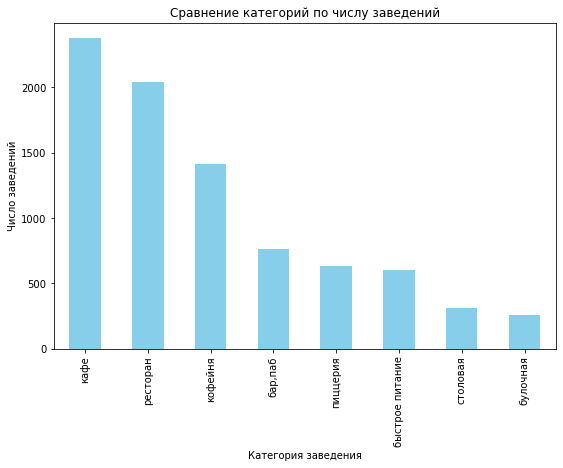

In [30]:
# Строим столбчатую диаграмму с использованием столбца 'category'
rest_df['category'].value_counts().plot.bar(title='Сравнение категорий по числу заведений',
                                            ylabel='Число заведений',
                                            xlabel='Категория заведения',
                                            color='skyblue',
                                            figsize=(9,6),
                                            legend=False)
plt.show(block=False)

Как видно из диаграммы: самые распространённые заведения Москвы это кафе,ресторан и кофейня. Это может указывать на  успешную деятельность  и востребованность у посетителей этих категорий заведений.

### 3.2. Исследуем число объектов общественного питания в зависимости от административного района Москвы и распределение категорий заведений в Центральном административном округе

В данных представлены 9 административных районов Москвы: Центральный административный округ,Северный административный округ,Южный административный округ,Западный административный округ,Восточный административный округ,Северо-Восточный административный округ,Северо-Западный административный округ,Юго-Западный административный округ и Юго-Восточный административный округ.

In [31]:
# Выведем все уникальные значения столбца с округами на экран
rest_df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Построим столбчатую диаграмму, чтобы определить распределение заведений по административным районам Москвы. И линейчатую диаграмму для определения числа различных категорий заведений в Центральном административном округе.

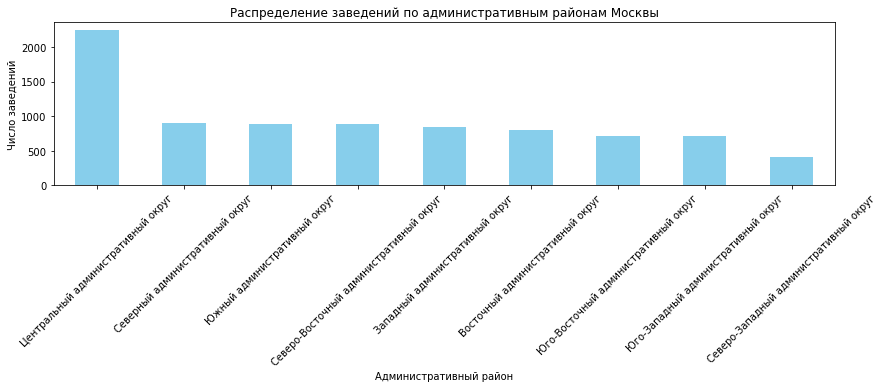

In [32]:
# Строим столбчатую диаграмму c использованием столбца 'district'
rest_df['district'].value_counts().plot.bar(title='Распределение заведений по административным районам Москвы',
                                            ylabel='Число заведений',
                                            xlabel='Административный район',
                                            color='skyblue',
                                            figsize=(14,3),
                                            legend=False)

plt.show(block=False)

Диаграмма показывает, что больше всего заведений находится в Центральном административном округе, а в остальных районах число заведений примерно одинаково. Это может указывать на то, что заведения общественного питания в данном районе пользуются повышенным спросом. Теперь построим линейчатую диаграмму для определения самых распространённых заведений в Центральном административном округе города Москвы.

In [33]:
# Отфильтруем датасет по Центральному административному округу
central_district_df=rest_df[(rest_df['district']=='Центральный административный округ')]

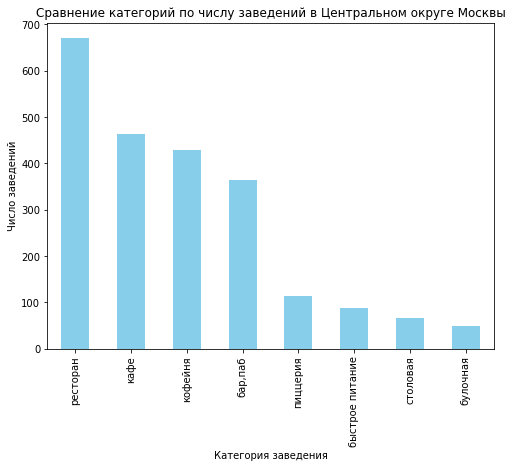

In [34]:
# Построим столбчатую диаграмму по отфильтрованному датасету
central_district_df['category'].value_counts().sort_values(ascending=False).plot.bar(title='Сравнение категорий по числу заведений в Центральном округе Москвы',
                                            ylabel='Число заведений',
                                            xlabel='Категория заведения',
                                            color='skyblue',
                                            figsize=(8,6),
                                            legend=False)
plt.show(block=False)

Самой распространённой категорией заведений в Центральном административном округе является ресторан. После идут кафе,кофейня и бар. Это стоит учитывать при выборе данного района при открытии нового заведения.

### 3.3. Исследуем соотношение сетевых и несетевых заведений по их числу и в разрезе категорий заведений

Сперва определим общее число сетевых и несетевых заведений в Москве. Для этого построим столбчатую диаграмму.

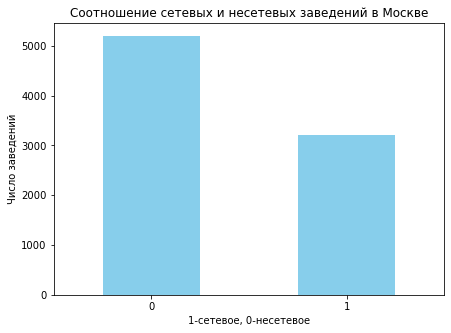

In [35]:
#Строим столбчатую диаграмму на основании того, является ли заведение сетевым, используя столбец 'chain'
rest_df['chain'].value_counts().plot.bar(title='Соотношение сетевых и несетевых заведений в Москве',
                                            ylabel='Число заведений',
                                            xlabel='1-сетевое, 0-несетевое',
                                            color='skyblue',
                                            rot=0,
                                            figsize=(7,5),
                                            legend=False)
plt.show(block=False)

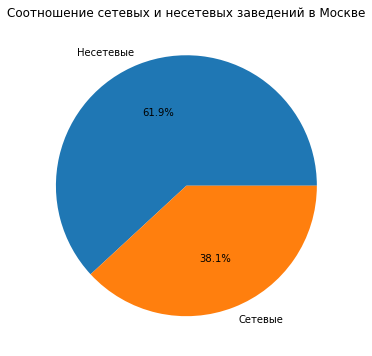

In [36]:
# Построим круговую диаграмму для визуализации соотношения по долям
plt.figure(figsize=(8,6))
plt.pie(rest_df['chain'].value_counts(), 
        labels=['Несетевые','Сетевые'],
        autopct = '%1.1f%%')  
plt.title('Соотношение сетевых и несетевых заведений в Москве')  
plt.show(block=False) 

Количество несетевых заведений примерно в 1,5 раза превышает количество сетевых. Это указывает на то, что и несетевые заведения пользуются популярностью и доверием у посетителей.

Теперь рассмотрим соотношени сетевых и несетевых заведений в разрезе их категорий. Постром столбчатую диаграмму.

In [37]:
# Создаём таблицу, которая группирует данные по 'category' и 'chain'
category_chain_df=rest_df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

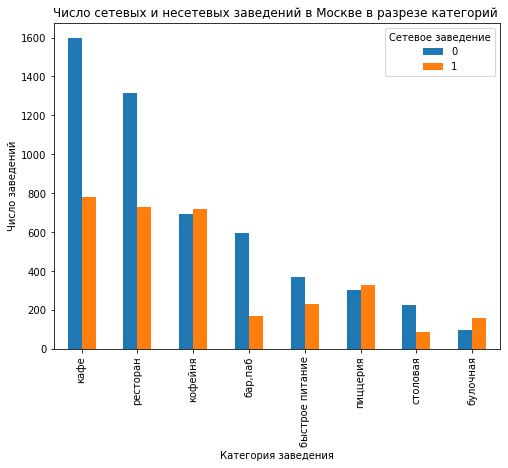

In [38]:
# Строим столбчатую диаграмму
category_chain_df.sort_values(by=0,ascending=False).plot.bar(title='Число сетевых и несетевых заведений в Москве в разрезе категорий ',
                                            ylabel='Число заведений',
                                            xlabel='Категория заведения',
                                            figsize=(8,6),
                                            legend=True)
plt.legend(title='Сетевое заведение')
plt.show(block=False)

Заведения категории кафе,ресторан,быстрое питание и столовая примерно в 2 раза чаще являются несетевыми, а бар(паб) в 3 раза чаще.Сетевые заведения немного преобладают только в 3 категориях: пиццерия,булочная и кофейня.

### 3.4. Исследуем количество посадочных мест в заведениях

Вначале выведем основные статистические показатели по столбцу `seats` методом describe()

In [39]:
rest_df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Среднее значение в данных сильно превышает медиану, что может говорить о выбросах. Построим гистограмму

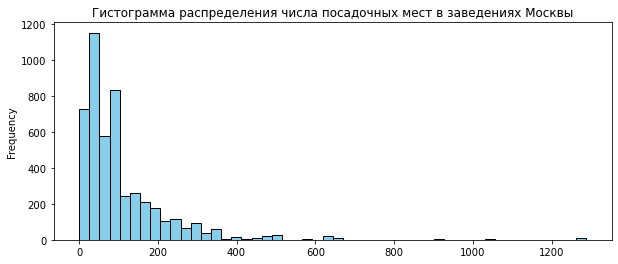

In [40]:
plt.figure(figsize=(10,4))
rest_df['seats'].plot.hist(bins=50,
                           color='skyblue',
                           edgecolor='black',
                           title='Гистограмма распределения числа посадочных мест в заведениях Москвы')
plt.show(block=False)

Гистограмма показывает правоасимметричное распределение данных. Виден ярко выраженный правый хвост, что указывает на наличие выбросов. Основные данные расположены между 0 и 200.

Построим диаграмму размаха для более детального отображения выбросов в данных

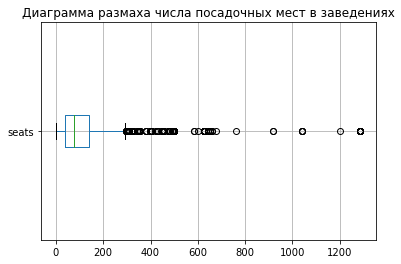

In [41]:
rest_df.boxplot(column='seats',
                vert=False)
plt.title('Диаграмма размаха числа посадочных мест в заведениях')
plt.show(block=False)

По диаграмме видно большое количество выбросов и аномальных значений в данных, что может быть связано с ошибками во время внесения пользователями информации о заведениях или искажёнными данными в общедоступных источниках.

Далее приведём для каждой категории заведения типичное(среднее) количество посадочных мест. Чтобы избежать сильного искажения средних значений из-за аномальных данных, найдём 99% процентиль по количеству посадочных мест, отфильтруем по этому значению датафрейм и создадим сводную таблицу.

In [42]:
# Найдём 99% процентиль
rest_df['seats'].quantile(0.99)

625.0

In [43]:
# Отфильтруем датасет по процентилю
filt_df=rest_df[(rest_df['seats']<625)]

In [44]:
# Создаём сводную таблицу со строками-категориями заведений и столбцом со средним числом посадочных мест
pivot_table=pd.pivot_table(filt_df,
                           index='category',
                           values='seats',
                           aggfunc='median')
display(pivot_table)

,seats
category,
"бар,паб",80.0
булочная,50.0
быстрое питание,65.0
кафе,60.0
кофейня,78.0
пиццерия,52.0
ресторан,86.0
столовая,75.0


Наибольшее количество посадочных мест типично для бара(паба) и ресторана, а наименьшее для булочной и пиццерии. Это важно учитывать при выборе площади помещения при открытии заведения.

### 3.5. Исследуем средний рейтинг заведения в зависимости от категории

Сгруппируем данные по категории заведения и найдём средний рейтинг для каждой категории

In [45]:
# Группируем данные и считаем средний рейтинг
grouped_df=rest_df.groupby('category')['rating'].mean()

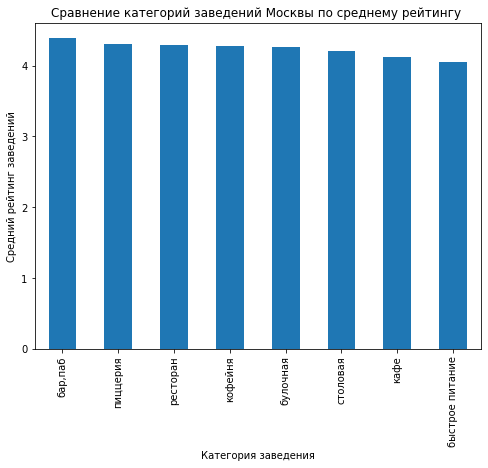

In [46]:
# Построим столбчатую диаграмму для определения различий в среднем рейтинге для разных категорий
grouped_df.sort_values(ascending=False).plot.bar(title='Сравнение категорий заведений Москвы по среднему рейтингу ',
                                            ylabel='Средний рейтинг заведений',
                                            xlabel='Категория заведения',
                                            figsize=(8,6),
                                            legend=False)
plt.show(block=False)

Сильных различий по среднему рейтингу среди различных категорий заведений нет. Чуть ниже средний рейтинг у заведений быстрого питания и кафе. Выше всего у баров и пабов.

### 3.6. Исследуем корреляцию рейтингов заведения с другими данными

Построим и визуализируем матрицу корреляции для столбца с рейтингом заведений с помощью метода phic_matrix()

In [47]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = rest_df[['category', 'district', 'chain', 'seats', 
                         'price_category','is_24_7',
                         'rating']].phik_matrix()

# Выводим результат
display('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,rating
price_category,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


Рейтинги заведений не показывают сильную корреляцию с другими признаками. Самая сильная связь с данными о ценовой категории заведения и составляет 0.26, с количеством посадочных мест связи нет. С остальными данными корреляция колеблется в диапазоне от 0.11 до 0.19. Визуализируем матрицу корреляции и подробнее изучим связь с ценовой категорией заведения.

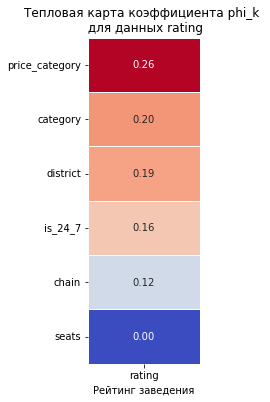

In [48]:
# Визуализируем матрицу корреляции
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show(block=False)

Коэффициент phi_k только указывает наличие связи, но не показывает вид связи: положительная или отрицательная. Для определения вида связи между рейтингом и ценовой категорией заведения построим столбчатую диаграмму завосимости среднего рейтинга от ценовой категории заведения.

In [49]:
# Группируем данные и считаем средний рейтинг
price_grouped_df=rest_df.groupby('price_category')['rating'].mean()

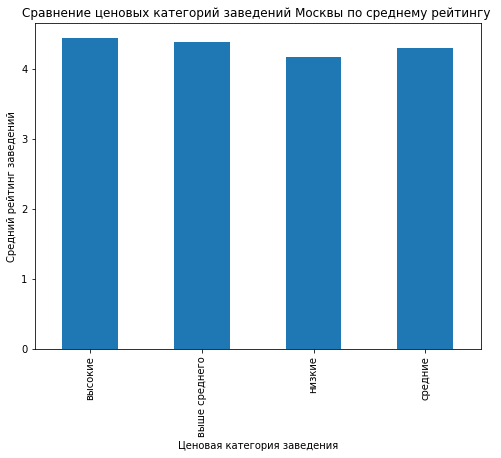

In [50]:
# Построим столбчатую диаграмму для определения различий в среднем рейтинге для разных ценовых категорий заведений
price_grouped_df.plot.bar(title='Сравнение ценовых категорий заведений Москвы по среднему рейтингу ',
                                            ylabel='Средний рейтинг заведений',
                                            xlabel='Ценовая категория заведения',
                                            figsize=(8,6),
                                            legend=False)
plt.show(block=False)

Диаграмма показывает, что чем выше ценовая категория заведения, тем выше средний рейтинг. Это указывает на небольшую положительную корреляцию между ценовой категорией заведения и рейтингом.

### 3.7. Выделяем и исследуем Топ-15 популярных сетей в Москве

In [51]:
# Отфильтруем датафрейм по сетевым заведениям
filtered_df=rest_df[rest_df['chain']==1]

In [52]:
# Выделим Топ-15 популярных сетей  Москвы по количеству заведений. Сохраним их в переменную t_15_series
t_15_series=filtered_df['name'].value_counts().head(15).reset_index()

In [53]:
# Выведем на экран Топ-15 сетей Москвы
display(t_15_series)

,index,name
0,шоколадница,120
1,домино'с пицца,76
2,додо пицца,74
3,one price coffee,71
4,яндекс лавка,69
5,cofix,65
6,prime,50
7,хинкальная,44
8,кофепорт,42
9,кулинарная лавка братьев караваевых,39


In [54]:
# Присоединим информацию из основной таблицы 
top_15_df=rest_df.merge(t_15_series,left_on='name',right_on='index',how='right')

In [55]:
# Выведем новый датафрейм на экран
display(top_15_df.head())

,id,name_x,category,address,district,working_hours,rating,chain,seats,price_category,avg_bill,middle_avg_bill,middle_coffee_cup_bill,is_24_7,index,name_y
0,08430997e8704765b498f55a6abc4b67,шоколадница,кофейня,"москва, дмитровское шоссе, 163ак1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",4.1,1,NaN,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,False,шоколадница,120
1,8933d8aac3964c189d43982b444ce93d,шоколадница,кофейня,"москва, широкая улица, 13а",Северо-Восточный административный округ,"ежедневно, 10:00–21:00",4.1,1,75.0,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,False,шоколадница,120
2,5a2a7476d34747eb875180e9d03fecc2,шоколадница,кофейня,"москва, фестивальная улица, 13, корп. 1",Северный административный округ,"ежедневно, 08:00–23:00",4.3,1,100.0,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,False,шоколадница,120
3,ab1775018fe44b33a6a7a1d6d0ac2f7b,шоколадница,кофейня,"москва, сходненская улица, 25",Северо-Западный административный округ,"ежедневно, 08:00–23:00",4.3,1,130.0,средние,Цена чашки капучино:239–274 ₽,NaN,256.0,False,шоколадница,120
4,9b40b6f03fb04535839bdd6cc7615637,шоколадница,кофейня,"москва, сходненская улица, 56",Северо-Западный административный округ,"ежедневно, 10:00–22:00",4.3,1,140.0,NaN,NaN,NaN,NaN,False,шоколадница,120


In [56]:
# Переименуем столбцы в датафрейме
top_15_df=top_15_df.rename(columns={'name_x':'name','name_y':'count'})

In [57]:
# Создадим сводную таблицу и выведем средний рейтинг заведений самых популярных сетей Москвы
pivot1=pd.pivot_table(top_15_df,
                     index=['name','count'],
                     values='rating',
                     aggfunc='mean')
display(pivot1)

,,rating
name,count,
cofefest,32,3.984375
cofix,65,4.075385
one price coffee,71,4.069445
prime,50,4.116000
буханка,32,4.396875
додо пицца,74,4.286487
домино'с пицца,76,4.171429
кофепорт,42,4.147619
кулинарная лавка братьев караваевых,39,4.394872


In [58]:
# Создадим сводную таблицу в которой отобразим категории заведений в Топ-15 сетей Москвы и их рейтинг
pivot2=pd.pivot_table(top_15_df,
                     index=['name','category'],
                     values='rating',
                     aggfunc='mean')
display(pivot2)

rating
name                                category                 
cofefest                            кафе             4.200000
                                    кофейня          3.977419
cofix                               кофейня          4.075385
one price coffee                    кофейня          4.069445
prime                               кафе             4.200000
                                    ресторан         4.114285
буханка                             булочная         4.416000
                                    кафе             4.300000
                                    кофейня          4.333333
додо пицца                          пиццерия         4.286487
домино'с пицца                      пиццерия         4.171429
кофепорт                            кофейня          4.147619
кулинарная лавка братьев караваевых кафе             4.394872
му-му                               бар,паб          4.300000
                                    быстрое питание  4.200000
                                    кафе             4.216667
                                    кофейня          4.250000
                                    пиццерия         4.300000
                                    ресторан         4.262500
                                    столовая         4.000000
теремок                             быстрое питание  4.450000
                                    ресторан         4.105556
хинкальная                          бар,паб          4.333333
                                    быстрое питание  4.366667
                                    кафе             4.352632
                                    ресторан         4.273334
                                    столовая         4.200000
чайхана                             быстрое питание  4.300000
                                    кафе             3.946154
                                    ресторан         3.777778
шоколадница                         кафе             4.100000
                                    кофейня          4.178151
яндекс лавка                        ресторан         3.872464

По количеству заведений выделяется сеть "Шоколадница", у которой 120 заведений. Средний рейтинг сети выше всего у "Кулинарная лавка братье Караваевых" и "Буханка" и составляет почти 4.4 . Средний рейтинг определенной категории  выше всего у заведений быстрого питания сети "Теремок" и у булочной сети "Буханка" и составляет чуть выше 4.41 . Восемь сетей из Топ-15 имеют несколько категорий заведений, что помогает диверсифицировать свою деятельность. 

### 3.8. Изучаем вариацию среднего чека в заведении в зависимости от района Москвы

Для сравнения разных районов по среднему чеку сгруппируем данные и построим столбчатую диаграмму

In [59]:
# Сгруппируем данные по столбцу 'district' и посчитаем средний чек по сгруппированным данным
grouped_dist_df=rest_df.groupby('district')['middle_avg_bill'].median()

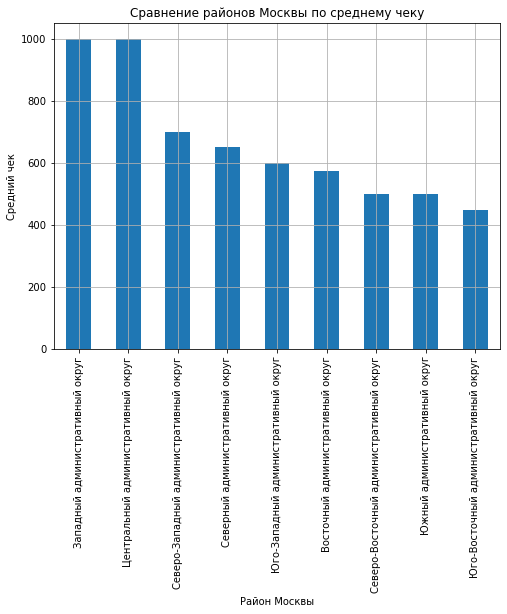

In [60]:
# Построим столбчатую диаграмму для сравнения районов между собой
grouped_dist_df.sort_values(ascending=False).plot.bar(title='Сравнение районов Москвы по среднему чеку',
                                            ylabel='Средний чек',
                                            xlabel='Район Москвы',
                                            figsize=(8,6),
                                            grid=True,
                                            legend=False)
plt.show(block=False)

Самый высокий средний чек в Центральном административном округе и Западном административном округе. Самый низкий в Северо-Восточном и Юго-Восточном округах. Как видно из диаграммы: с удалением от Центрального и Западного округов средний чек в заведении снижается.

##### Выделим ключевые моменты после исследовательского анализа данных: 
- Самые распространённые заведения Москвы это кафе,ресторан и кофейня
- Самое большое количество заведений расположено в Центральном административном округе Москвы, среди них выделяются ресторан,кафе,кофейня и бар(паб). Ресторан занимает лидирующую позицию по числу заведений в округе.
- Количество несетевых заведений примерно в 1,5 раза превышает количество сетевых. Заведения категории кафе,ресторан,быстрое питание и столовая примерно в 2 раза чаще являются несетевыми, а бар(паб) в 3 раза чаще.Сетевые заведения немного преобладают только в 3 категориях: пиццерия,булочная и кофейня.
- Самоё распространённое количество посадочных мест в заведениях составляет около 75.Наибольшее количество посадочных мест типично для бара(паба) и ресторана, а наименьшее для булочной и пиццерии.
- Рейтинги заведений не показывают сильную корреляцию с другими признаками. Самая сильная связь с данными о ценовой категории заведения составляет 0.26 и связь положительная, с количеством посадочных мест связи нет. С остальными данными корреляция колеблется в диапазоне от 0.11 до 0.19
- Самыми крупными сетями в Москве являются "Кафе" и "Шоколадница" с 189 и 120 заведениями соответственно. Сеть "Кафе" представлена 7 различными категориями заведений, а "Шоколадница" двумя. Средний рейтинг сети выше всего у "Кулинарная лавка братье Караваевых" и составляет почти 4.4 . Средний рейтинг определенной категории выше всего у заведений быстрого питания сети "Теремок".
- Самый высокий средний чек в заведениях Центрального и Западного административных округов. С удалением от них средний чек снижается.

## 4. Итоговый вывод и рекомендации

 1. В ходе исследования были проанализированы данные о заведениях общественного питания Москвы, собранные на основе сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные были оптимизированы и проверены на пропуски, а также дубликаты. Было обнаружено много пропусков в данных с информацией о среднем чеке и ценовых категориях заведений. Пропуски в количестве посадочных мест составляли 6% от всех данных и были оставлены без удаления. Пропуски в других столбцах также оставили, так как их нельзя было удалить или заполнить определённым значением, а также 3 столбца не были использованы в анализе. Дубликатов как явных, так и неявных обнаружено не было. Размерность в столбцах с числовыми данными была оптимизирована. После обработки данных был проведен исследовательский анализ.
 
 2. В ходе исследовательского анализа на основе визуализаций и детального исследования были отмечены следующие выводы:
- Самые распространённые заведения Москвы это кафе,ресторан и кофейня
- Самое большое количество заведений расположено в Центральном административном округе Москвы, среди них выделяются ресторан,кафе,кофейня и бар(паб). Ресторан занимает лидирующую позицию по числу заведений в округе.
- Количество несетевых заведений примерно в 1,5 раза превышает количество сетевых. Заведения категории кафе,ресторан,быстрое питание и столовая примерно в 2 раза чаще являются несетевыми, а бар(паб) в 3 раза чаще.Сетевые заведения немного преобладают только в 3 категориях: пиццерия,булочная и кофейня.
- Самоё распространённое количество посадочных мест в заведениях составляет около 75.Наибольшее количество посадочных мест типично для бара(паба) и ресторана, а наименьшее для булочной и пиццерии.
- Рейтинги заведений не показывают сильную корреляцию с другими признаками. Самая сильная связь с данными о ценовой категории заведения составляет 0.26 и связь положительная, с количеством посадочных мест связи нет. С остальными данными корреляция колеблется в диапазоне от 0.11 до 0.19
- Самыми крупными сетями в Москве являются "Кафе" и "Шоколадница" с 189 и 120 заведениями соответственно. Сеть "Кафе" представлена 7 различными категориями заведений, а "Шоколадница" двумя. Средний рейтинг сети выше всего у "Кулинарная лавка братье Караваевых" и составляет почти 4.4 . Средний рейтинг определенной категории выше всего у заведений быстрого питания сети "Теремок".
- Самый высокий средний чек в заведениях Центрального и Западного административных округов. С удалением от них средний чек снижается.

3. Рекомендации: при открытии нового заведения стоит обратить внимание на 3 самые популярные категории в Москве: ресторан, кафе или кофейня с числом посадочных мест в районе 75. При выборе места для открытия заведения стоит обратить внимание на Центральный административный округ. Заведение здесь предполагает высокий уровень сервиса для посетителей, но и допускает завышенные цены, по сравнению с другими районами Москвы.  
 